In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


import os
import gzip
import cv2
import numpy as np

current_data_path = os.getcwd() + "\\data"
print(os.listdir(current_data_path))

import gzip
def replaceZeroes(data):
    min_nonzero= min(data[np.nonzero(data)])
    data[data == 0] = min_nonzero
    return data


with gzip.open(current_data_path + '\\train-images-idx3-ubyte (2).gz','r') as f:
    image_size = 28
    num_images = 60000
    import numpy as np
    f.read(16)
    buf = f.read(image_size * image_size * num_images)
    x_train = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    x_train = x_train.reshape(num_images, image_size, image_size, 1)

with gzip.open(current_data_path + '\\train-labels-idx1-ubyte (1).gz','r') as f:
    image_size = 28
    num_images = 60000

    import numpy as np
    f.read(16)

    buf = f.read(image_size * image_size * num_images)
    x_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    x_labels = x_labels.reshape(num_images, image_size, image_size, 1)



import matplotlib.pyplot as plt
image = np.asarray(x_train[15001]).squeeze()
plt.imshow(image, "Greys")
print(len(x_train))

2


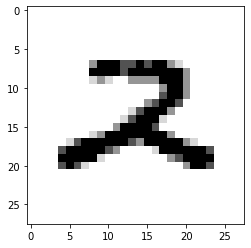

In [2]:
import matplotlib.pyplot as plt
image_index = 15005 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [3]:
x_train.shape
image_size = 28
num_train_images = 60000
num_test_images = 10000

x_train = x_train.reshape(num_train_images, image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(num_test_images, image_size, image_size, 1).astype('float32')
input_shape = (image_size, image_size, 1)
#Normalising data
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)



x_train shape: (60000, 28, 28, 1)


In [4]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(x=x_train,y=y_train, epochs=10, verbose=1)
model.evaluate(x_test, y_test)

Epoch 1/10


9


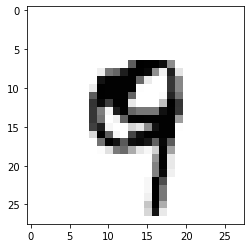

In [9]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())